In [1]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
#Mengimpor dataset
dataset = pd.read_csv('DataDramaAsia.csv')
X = dataset.iloc[:, [2,4]].values
dataset




,No,Judul,Episode,Rating,Views
0,1,A beautiful mind 2016,18,8.4,177
1,2,A Gentleman's Dignity,20,8.3,156
2,3,A Korean Odyssey,20,8.3,136
3,4,A Love To Kill,16,7.4,133
4,5,A Piece of Your Mind,12,8.2,146
...,...,...,...,...,...
195,196,Galileo,10,8.1,3036
196,197,Gisou Furin,10,7.4,2752
197,198,Gokusen,12,8.1,7490
198,199,Gokusen 2,10,7.9,3102


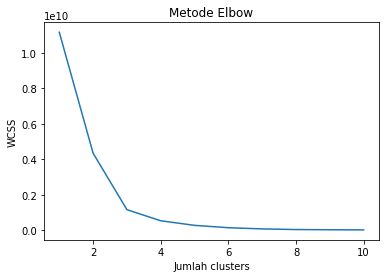

In [8]:
# Menggunakan metode elbow untuk menentukan angka cluster yang tepat
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()



In [9]:
# Menjalankan K-Means Clustering ke dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


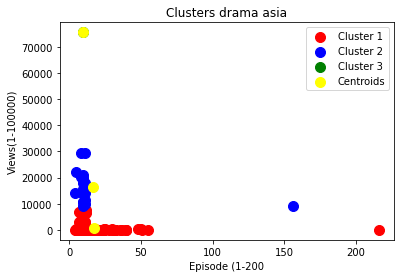

In [10]:

# Visualisasi hasil clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters drama asia')
plt.xlabel('Episode (1-200')
plt.ylabel('Views(1-100000)')
plt.legend()
plt.show()